# Data preprocessing

Description: This script cleans up the percentage estimates of SVI indices for Baltimore city. It removes any missing data and normalizes the indices.

Input data: CDC Social vulnerability (SVI) data collected from the 2018 census, for the state of Maryland.
- Documentation: https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2018.html

Output data:  Normalized percentage estimates of SVI indices for census tracts (without missing data) in Baltimore city.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Filter SVI data by Baltimore City county
df = pd.read_csv("../raw_data/svi_md.csv")
df = df.loc[df['STCNTY'] == 24510] 
df = df.replace(-999, np.nan)

# Extract the percentage estimate columns
ep_df = df.loc[:, df.columns.str.contains('FIPS|EP_.*')]

# Remove data for 2 census tracts with missing data
drop_fips = [
             24510250600,  # South harbor
             24510100300   # Prison
             ]
drop_indices = ep_df.index[ep_df["FIPS"].isin(drop_fips)]
ep_df = ep_df.drop(index=drop_indices)

ep_df.head()

,FIPS,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_MINRTY,EP_LIMENG,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_UNINSUR
15,24510010300,4.3,1.1,68345.0,4.5,4.7,9.8,4.4,1.8,14.9,0.9,0.7,0.0,0.6,5.5,0.0,2.0
22,24510240400,2.1,2.2,51469.0,10.8,7.6,11.5,3.6,1.9,6.1,0.0,13.8,0.0,0.5,4.0,0.0,5.0
28,24510261100,7.7,5.3,63780.0,4.8,5.6,9.7,8.5,1.4,14.7,0.0,0.0,0.0,0.5,8.4,0.0,3.4
29,24510271102,2.9,3.3,32299.0,0.0,5.8,5.8,2.5,1.1,39.1,0.3,0.0,0.0,0.0,1.4,74.3,3.3
37,24510010200,5.9,1.4,56058.0,4.5,8.0,11.9,7.7,1.1,11.3,0.3,8.0,0.0,0.7,7.8,0.0,2.5


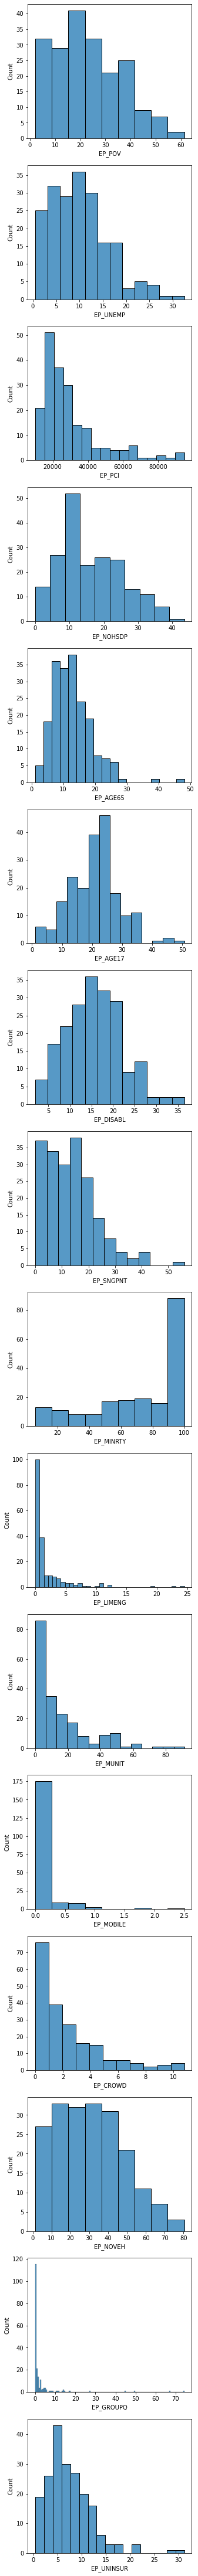

In [3]:
# Plot percentage estimates of all SVI indices.
# Visualize using histogram plots. 
def get_hists(cols, data):
    fig, axs = plt.subplots(len(cols), 1, figsize=(5, 5 * len(cols)))
    for ax, col in zip(axs, cols):
        sns.histplot(data=data, x=col, ax=ax)


cols = ep_df.columns[1:] # ignore the FIPS column
get_hists(cols, ep_df)

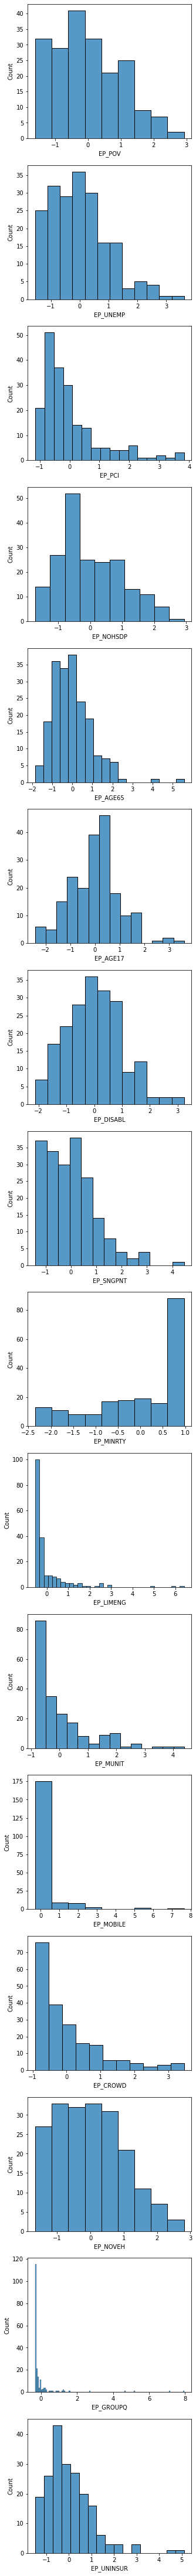

In [4]:
# Standardize data to mean zero, variance 1
scaler = StandardScaler()
df_temp = ep_df.drop(columns='FIPS')
scaled_df = pd.DataFrame(scaler.fit_transform(df_temp), columns = df_temp.columns)

# Re-plot the normalized estimates
cols = scaled_df.columns
get_hists(cols, scaled_df)

<AxesSubplot:>

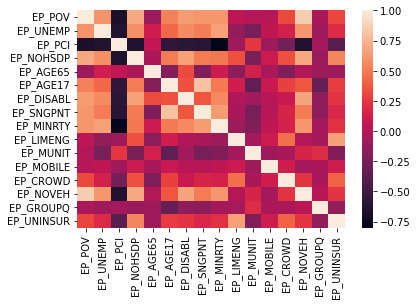

In [5]:
# Use correlation analysis to understand which 
# variables are highly correlated. 
corr_matrix = scaled_df.corr()
sns.heatmap(corr_matrix)

In [6]:
# Add back the FIPS columns in final processing
scaled_df['FIPS'] = list(ep_df['FIPS'])
scaled_df.to_csv("../processed_data/SVI_EP_Standard_Scaled.csv", index=False)